In [0]:
import os
import matplotlib.pyplot as plt
import random
import shutil
import time
import zipfile
import tensorflow as tf
from matplotlib.pyplot import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Create temporary folder for dataset
#kaggle datasets download -d jordiviader/american-sign-language-alphabet-static \
#-O /tmp/DataSet_Signos.zip

local_zip = '/content/gdrive/My Drive/Dataset/434893_825879_bundle_archive.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()  

In [10]:
os.listdir('/tmp')

['drivefs_ipc.0_shell', 'tmp8zocabpf', 'DataSet Signos', 'drivefs_ipc.0']

In [9]:
# For Splitting in Colab (Online Computing)
data_dir  = '/tmp/DataSet Signos'
train_dir = os.path.join(data_dir,'train')
val_dir   = os.path.join(data_dir,'validation')
label = dict()                                 # Original Dataset Label
count = 0                                      # Constant
Label = dict()                                 # Splitting Dataset Label
Count = dict()                                 # Number of Split Data
train_size,val_size = 0.7,0.3                  # Portion of Split (0-1)

# EXTRACT RAW INFORMATION 
if train_size+val_size > 1.0:
        raise Exception('Cummulative data split portion out of maximum range (>1)')
for DIR in os.listdir(data_dir):
    if len(DIR) == 1:
        sub_dir = os.path.join(data_dir,DIR)
        number = len(os.listdir(sub_dir))
        label[DIR] = number
        print(f'Number of images in directory {DIR} is {number}')
        count += number
        
# GENERATE DIRECTORIES FOR DATASET
if os.path.isdir(train_dir):
    shutil.rmtree(train_dir)
    os.mkdir(train_dir)
    print('\nTraining directory has been recreated')
else:
    os.mkdir(train_dir)
    print('\nTraining directory has been created')
if os.path.isdir(val_dir):
    shutil.rmtree(val_dir)
    os.mkdir(val_dir)
    print('Validation directory has been recreated')
else:
    os.mkdir(val_dir)
    print('Validation directory has been created')

# GENERATE SUBDIRECTORIES FOR DATASET
for i in list(label.keys()):
    new_dir_train = os.path.join(train_dir,i)
    new_dir_val = os.path.join(val_dir,i)
    try:
        os.mkdir(new_dir_train)
        os.mkdir(new_dir_val)
    except:
        print(f'\nSubdirectories has been created before\n')
        
# SHUFFLE-SPLIT AND COPY DATASET INTO DIRECTORIES
for DIR in os.listdir(data_dir):
    if len(DIR) == 1:
        link = os.path.join(data_dir,DIR)
        dataset = os.listdir(link)
        random.shuffle(dataset)
        num = label[DIR]
        train_length,val_length = int(train_size*num),int(val_size*num)
        train_directory = os.path.join(train_dir,DIR)
        val_directory = os.path.join(val_dir,DIR)
        train,val = dataset[:train_length],dataset[train_length:] 
        for i in train:
            source_train = os.path.join(link,i)
            destination_train = os.path.join(train_directory,i)
            shutil.copyfile(source_train,destination_train)
        for j in val:
            source_val = os.path.join(link,j)
            destination_val = os.path.join(val_directory,j)
            shutil.copyfile(source_val,destination_val)
for DIR in os.listdir(data_dir):
    if len(DIR)>1:
        c = 0
        directory = os.path.join(data_dir,DIR)
        for subdir in os.listdir(directory):
            sub_dir = os.path.join(directory,subdir)
            number = len(os.listdir(sub_dir))
            Label[DIR+'_'+subdir] = number
            c += number
        Count[DIR] = c
train_len,val_len = Count['train'],Count['validation']
print(f'\nLabel of original data :\n{list(label.keys())}\n')
print(f'Total images in original dataset         : {count}\n')
print(f'Total dataset after and before split     : {sum(Count.values()),count}\n')
print(f'Total numbers of training and validation : {train_len,val_len}')

Number of images in directory T is 56
Number of images in directory G is 85
Number of images in directory U is 57
Number of images in directory X is 51
Number of images in directory I is 74
Number of images in directory L is 72
Number of images in directory B is 78
Number of images in directory W is 54
Number of images in directory K is 74
Number of images in directory N is 67
Number of images in directory Q is 69
Number of images in directory Y is 58
Number of images in directory O is 85
Number of images in directory H is 71
Number of images in directory M is 71
Number of images in directory V is 57
Number of images in directory D is 73
Number of images in directory C is 131
Number of images in directory R is 65
Number of images in directory E is 155
Number of images in directory S is 52
Number of images in directory A is 63
Number of images in directory P is 86
Number of images in directory F is 84

Training directory has been created
Validation directory has been created

Label of o

Dataset in folder /tmp/DataSet Signos/validation/O

Pixel min and max : (0, 255)
Shape of Image Data in the folder



{'O_IMG_1204.JPG': (480, 720, 3),
 'O_IMG_1205.JPG': (480, 720, 3),
 'O_IMG_1212.JPG': (480, 720, 3),
 'O_IMG_1213.JPG': (480, 720, 3),
 'O_IMG_1215.JPG': (480, 720, 3),
 'O_IMG_1219.JPG': (480, 720, 3),
 'O_IMG_1220.JPG': (480, 720, 3),
 'O_IMG_1227.JPG': (480, 720, 3),
 'O_IMG_1228.JPG': (480, 720, 3),
 'O_IMG_1229.JPG': (480, 720, 3),
 'O_IMG_1238.JPG': (480, 720, 3),
 'O_IMG_1252.JPG': (480, 720, 3),
 'O_IMG_1257.JPG': (480, 720, 3),
 'O_IMG_1260.JPG': (480, 720, 3),
 'O_IMG_1270.JPG': (480, 720, 3),
 'O_IMG_1271.JPG': (480, 720, 3)}

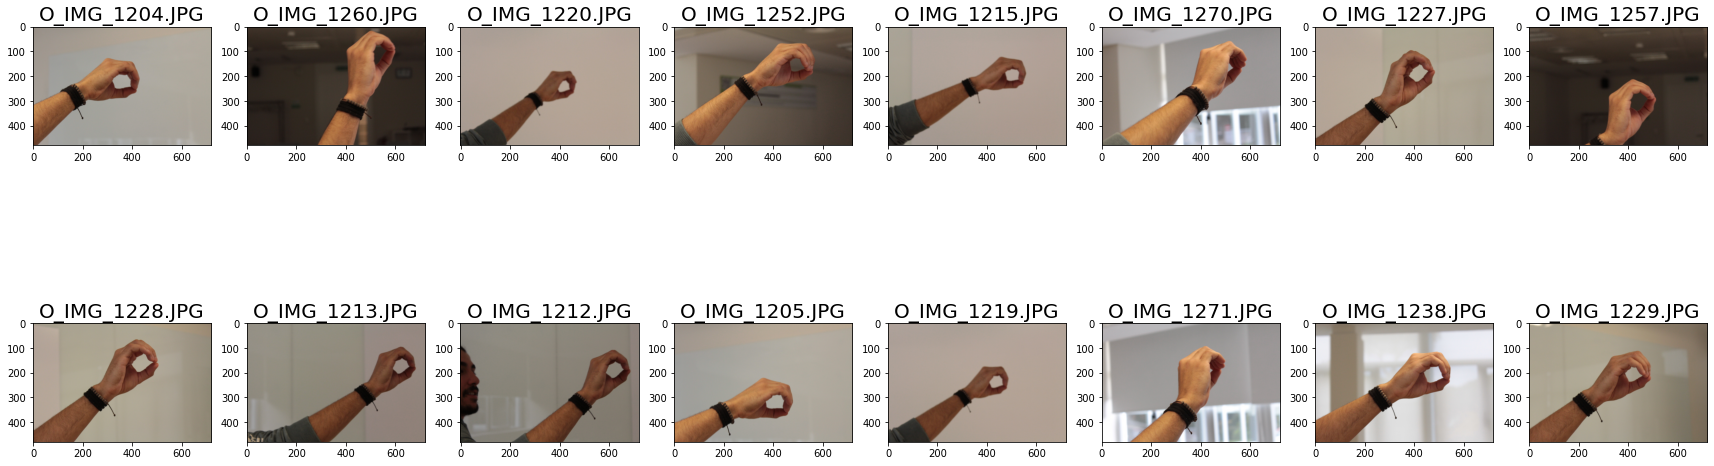

In [11]:
%matplotlib inline
dir_link  = val_dir                              # Link of directory for plotting
dir_label = 'O'                                  # Spesific label for directory
images    = 16                                   # Numbers of images plot
row       = 2                                    # Axes row setting
link      = os.path.join(dir_link,dir_label)     # Full link of images
shape     = dict()                               # Shape of images
fig,ax = plt.subplots(figsize=(30,10),nrows=row,ncols=images//row)
min_pixel = 0
max_pixel = 0
print(f'Dataset in folder {link}\n')
for i in range(images):
    if images > len(os.listdir(link)):
        raise Exception('Data in directory is out of number of plot')
    else:
        img_train    = imread(os.path.join(link,os.listdir(link)[i]))
        if img_train.min() <= min_pixel:
            min_pixel  = img_train.min()
        if img_train.max() > max_pixel:
            max_pixel = img_train.max()
        title = dir_label+'_'+os.listdir(link)[i]
        shape[title] = img_train.shape
        try:
            ax[i%row,i//row].imshow(img_train)
            ax[i%row,i//row].set_title(title,fontsize=20)
        except:
            pass
print(f'Pixel min and max : {min_pixel,max_pixel}')
print('Shape of Image Data in the folder\n')
shape

In [12]:
tf.keras.backend.clear_session()
# DEFINING EARLYSTOPPING
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.perf_counter()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.perf_counter() - self.epoch_time_start)
        
class LossCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get("loss") < 0.001:
            print("\nReached 0.001 loss so cancelling fitting process!")
            self.model.stop_training = True
        elif logs.get("accuracy") > 0.95:
            print("\nReached 95% training accuracy so cancelling fitting process!")
            self.model.stop_training = True
        elif logs.get("val_accuracy") > 0.95:
            print("\nReached 95% validation accuracy so cancelling fitting process!")
            self.model.stop_training = True

time_callback = TimeHistory()
loss_callback = LossCallback()

# DEFINING IMAGEDATAGENERATOR
TRAINING_DIR   = train_dir
VALIDATION_DIR = val_dir
img_shape      = list(shape.values())[0]
num_classes    = len(label)
batch_size     = 32
training_datagen = ImageDataGenerator(
    rescale = 1./max_pixel,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./max_pixel
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=img_shape[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=img_shape[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size
)

first_batch = (train_generator[0][0])
print(first_batch.shape)
img_batch  = tf.constant([batch_size,img_shape[0],img_shape[1],img_shape[2]])
img_batch

Found 1238 images belonging to 24 classes.
Found 550 images belonging to 24 classes.
(32, 480, 720, 3)


<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 32, 480, 720,   3], dtype=int32)>

In [0]:
# Create the base model from the pre-trained model MobileNet V2

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 480, 720, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 481, 721, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 240, 360, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 240, 360, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
feature_batch = base_model(first_batch)
print(f'feature_batch shape : {feature_batch.shape}')
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(f'feature_batch_average shape : {feature_batch_average.shape}')
prediction_layer = tf.keras.layers.Dense(num_classes,activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(f'prediction_batch shape : {prediction_batch.shape}')

# Define Model Transfer 
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001
opt = tf.keras.optimizers.RMSprop(lr=base_learning_rate)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(f'Trainable model variable/layer: {len(model.trainable_variables)}\n')
model.summary()

feature_batch shape : (32, 15, 23, 1280)
feature_batch_average shape : (32, 1280)
prediction_batch shape : (32, 24)
Trainable model variable/layer: 2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 15, 23, 1280)      2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 24)                30744     
Total params: 2,288,728
Trainable params: 30,744
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
history = model.fit(train_generator, 
                    epochs=1000, steps_per_epoch=20, 
                    validation_data = validation_generator, 
                    verbose = 1, validation_steps=3,
                    callbacks=[time_callback, loss_callback])

Epoch 1/1000
20/20 [==============================] - 56s 3s/step - loss: 3.2031 - accuracy: 0.0873 - val_loss: 2.9675 - val_accuracy: 0.1354
Epoch 2/1000
20/20 [==============================] - 55s 3s/step - loss: 2.9181 - accuracy: 0.1476 - val_loss: 2.6902 - val_accuracy: 0.2083
Epoch 3/1000
20/20 [==============================] - 55s 3s/step - loss: 2.6762 - accuracy: 0.2698 - val_loss: 2.4688 - val_accuracy: 0.3229
Epoch 4/1000
20/20 [==============================] - 55s 3s/step - loss: 2.5071 - accuracy: 0.3187 - val_loss: 2.2967 - val_accuracy: 0.4271
Epoch 5/1000
20/20 [==============================] - 56s 3s/step - loss: 2.2846 - accuracy: 0.3873 - val_loss: 2.1769 - val_accuracy: 0.4271
Epoch 6/1000
20/20 [==============================] - 55s 3s/step - loss: 2.1258 - accuracy: 0.4825 - val_loss: 1.9704 - val_accuracy: 0.5417
Epoch 7/1000
20/20 [==============================] - 56s 3s/step - loss: 2.0329 - accuracy: 0.4857 - val_loss: 1.8283 - val_accuracy: 0.5938
Epoch 

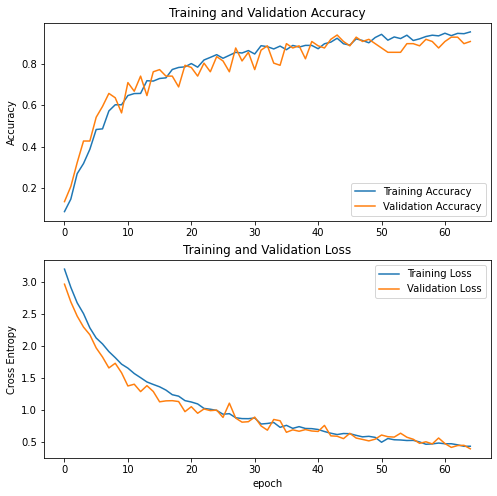

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
model.save_weights('my_model.h5', save_format='h5')

In [0]:
model.save('model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets


In [0]:
import tempfile
tmpdir = tempfile.mkdtemp()
model_save_path = os.path.join(tmpdir, "model/1/")
tf.saved_model.save(model, model_save_path)

INFO:tensorflow:Assets written to: /tmp/tmphbja7kvw/model/1/assets


In [0]:
os.listdir('/tmp/tmphbja7kvw/model/1/')

['assets', 'saved_model.pb', 'variables']

#  **NEW SECTION** --FULL DATA TRAINING

In [13]:
tf.keras.backend.clear_session()

# Clear Folder without Train-Val set
for i in os.listdir(data_dir):
    if len(i) > 1:
        shutil.rmtree(os.path.join(data_dir,i))
print(os.listdir(data_dir))
# DEFINING EARLYSTOPPING
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.perf_counter()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.perf_counter() - self.epoch_time_start)
        
class LossCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get("loss") < 0.004:
            print("\nReached 0.004 training loss so cancelling training!")
            self.model.stop_training = True
        elif logs.get("accuracy") > 0.95:
            print("\nReached 95% training accuracy so cancelling training!")
            self.model.stop_training = True

time_callback = TimeHistory()
loss_callback = LossCallback()

# DEFINING IMAGEDATAGENERATOR (INTO ORIGINAL DATASET FOLDER)
TRAINING_DIR   = data_dir
img_shape      = list(shape.values())[0]
num_classes    = len(label)
batch_size     = batch_size
training_datagen = ImageDataGenerator(
    rescale = 1./max_pixel,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=img_shape[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size
)

first_batch = (train_generator[0][0])
print(first_batch.shape)
img_batch  = tf.constant([batch_size,img_shape[0],img_shape[1],img_shape[2]])
img_batch

['T', 'G', 'U', 'X', 'I', 'L', 'B', 'W', 'K', 'N', 'Q', 'Y', 'O', 'H', 'M', 'V', 'D', 'C', 'R', 'E', 'S', 'A', 'P', 'F']
Found 1788 images belonging to 24 classes.
(32, 480, 720, 3)


<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 32, 480, 720,   3], dtype=int32)>

In [15]:
# Create the base model from the pre-trained model MobileNet V2
base_model_full = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')
base_model_full.trainable = False

# Trainable Layers
feature_batch = base_model_full(first_batch)
print(f'feature_batch shape : {feature_batch.shape}')
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(f'feature_batch_average shape : {feature_batch_average.shape}')
prediction_layer = tf.keras.layers.Dense(num_classes,activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(f'prediction_batch shape : {prediction_batch.shape}')

# Define Model Transfer 
model_full = tf.keras.Sequential([base_model_full,
                                  global_average_layer,
                                  prediction_layer])
base_learning_rate = 0.0001
opt = tf.keras.optimizers.RMSprop(lr=base_learning_rate)
model_full.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(f'Trainable model variable/layer: {len(model_full.trainable_variables)}\n')
model_full.summary()

feature_batch shape : (32, 15, 23, 1280)
feature_batch_average shape : (32, 1280)
prediction_batch shape : (32, 24)
Trainable model variable/layer: 2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 15, 23, 1280)      2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                30744     
Total params: 2,288,728
Trainable params: 30,744
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
history_full = model_full.fit(train_generator, 
                    epochs=1000, 
                    steps_per_epoch=20,  
                    verbose = 1, 
                    callbacks=[time_callback, loss_callback])

Epoch 1/1000
20/20 [==============================] - 44s 2s/step - loss: 3.2198 - accuracy: 0.0975
Epoch 2/1000
20/20 [==============================] - 44s 2s/step - loss: 2.8729 - accuracy: 0.1934
Epoch 3/1000
20/20 [==============================] - 45s 2s/step - loss: 2.6616 - accuracy: 0.2453
Epoch 4/1000
20/20 [==============================] - 45s 2s/step - loss: 2.5027 - accuracy: 0.3250
Epoch 5/1000
20/20 [==============================] - 44s 2s/step - loss: 2.3305 - accuracy: 0.3868
Epoch 6/1000
20/20 [==============================] - 44s 2s/step - loss: 2.2404 - accuracy: 0.4308
Epoch 7/1000
20/20 [==============================] - 44s 2s/step - loss: 2.1062 - accuracy: 0.4528
Epoch 8/1000
20/20 [==============================] - 44s 2s/step - loss: 1.9317 - accuracy: 0.5252
Epoch 9/1000
20/20 [==============================] - 44s 2s/step - loss: 1.9033 - accuracy: 0.5625
Epoch 10/1000
20/20 [==============================] - 44s 2s/step - loss: 1.8072 - accuracy: 0.5645

Text(0.5, 0, 'Epochs')

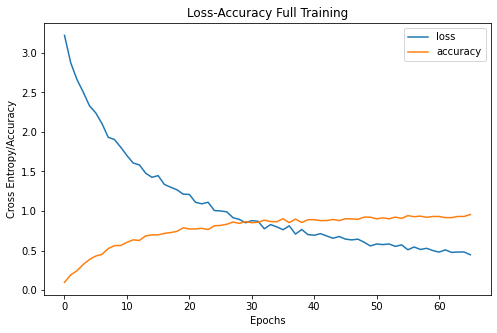

In [21]:
import pandas as pd

loss = pd.DataFrame(history_full.history)
fig,ax = plt.subplots(figsize=(8,5))
loss.plot(ax=ax)
ax.set_title('Loss-Accuracy Full Training')
ax.set_ylabel('Cross Entropy/Accuracy')
ax.set_xlabel('Epochs')

In [17]:
import tempfile
model_full.save_weights('my_model_full.h5', save_format='h5')
model_full.save('model_full')
tmpdir = tempfile.mkdtemp()
model_full_save_path = os.path.join(tmpdir, "model_full/1/")
tf.saved_model.save(model_full, model_full_save_path)
print(model_full_save_path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_full/assets
INFO:tensorflow:Assets written to: /tmp/tmpmvkw8ebx/model_full/1/assets
/tmp/tmpmvkw8ebx/model_full/1/
